<a href="https://colab.research.google.com/github/vikaschaudhary53/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing all the required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [4]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Module 1/Python for Data Science/Capstone Project: Global Terrorism Analysis/Global Terrorism Data.csv'

In [5]:
gt_df = pd.read_csv(file_path, encoding="ISO-8859–1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Plotting the first five rows
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
#Plotting the last five rows
gt_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
gt_df.shape

(181691, 135)

In [9]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
# Creating a column dictionary to rename the required columns

column_dict = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City','region_txt':'Region',
               'attacktype1_txt':'Attack', 'targtype1_txt':'Target', 'gname': 'Group_Name', 'motive':'Motive', 
               'weaptype1_txt':'Weapon', 'nkill':'Death', 'nkillter': 'Perpetrator_Death', 'nwound':'Wounded', 'nwoundte':'Perpetrator_Wounded','propextent_txt':'Property', 'ransomamt':'Ransom_Amt'}

In [11]:
# Renaming the columns
gt_df.rename(columns = column_dict, inplace = True)

In [12]:
# Keeping only those columns which are in the dictionary
required_columns = list(column_dict.values())
print(required_columns)

['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region', 'Attack', 'Target', 'Group_Name', 'Motive', 'Weapon', 'Death', 'Perpetrator_Death', 'Wounded', 'Perpetrator_Wounded', 'Property', 'Ransom_Amt']


In [13]:
gt_df = gt_df[required_columns]

In [14]:
gt_df.shape

(181691, 18)

### The number of columns have been reduced from 135 to 18.

In [15]:
gt_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,NaN,0.0,NaN,NaN,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,NaN,0.0,NaN,NaN,800000.0
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,NaN,0.0,NaN,NaN,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,Sub-Saharan Africa,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,0.0,2.0,0.0,NaN,NaN
181687,2017,12,31,Syria,Lattakia,Jableh,Middle East & North Africa,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,0.0,7.0,0.0,Unknown,NaN
181688,2017,12,31,Philippines,Maguindanao,Kubentog,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,0.0,0.0,Unknown,NaN
181689,2017,12,31,India,Manipur,Imphal,South Asia,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,0.0,0.0,NaN,NaN


In [16]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 181691 non-null  int64  
 1   Month                181691 non-null  int64  
 2   Day                  181691 non-null  int64  
 3   Country              181691 non-null  object 
 4   State                181270 non-null  object 
 5   City                 181257 non-null  object 
 6   Region               181691 non-null  object 
 7   Attack               181691 non-null  object 
 8   Target               181691 non-null  object 
 9   Group_Name           181691 non-null  object 
 10  Motive               50561 non-null   object 
 11  Weapon               181691 non-null  object 
 12  Death                171378 non-null  float64
 13  Perpetrator_Death    114733 non-null  float64
 14  Wounded              165380 non-null  float64
 15  Perpetrator_Wound

#### There are 9 columns out of 18 columns with some NaN values.

In [17]:
# Filling the NaN values of the columns
gt_df['State'].fillna('Unknown', inplace=True)
gt_df['City'].fillna('Unknown', inplace=True)
gt_df['Motive'].fillna('Unknown', inplace=True)
gt_df['Death'].fillna(0, inplace=True)
gt_df['Perpetrator_Death'].fillna(0, inplace=True)
gt_df['Wounded'].fillna(0, inplace=True)
gt_df['Perpetrator_Wounded'].fillna(0, inplace=True)
gt_df['Property'].fillna('Unknown', inplace=True)
gt_df['Ransom_Amt'].fillna(0, inplace=True)

In [18]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 181691 non-null  int64  
 1   Month                181691 non-null  int64  
 2   Day                  181691 non-null  int64  
 3   Country              181691 non-null  object 
 4   State                181691 non-null  object 
 5   City                 181691 non-null  object 
 6   Region               181691 non-null  object 
 7   Attack               181691 non-null  object 
 8   Target               181691 non-null  object 
 9   Group_Name           181691 non-null  object 
 10  Motive               181691 non-null  object 
 11  Weapon               181691 non-null  object 
 12  Death                181691 non-null  float64
 13  Perpetrator_Death    181691 non-null  float64
 14  Wounded              181691 non-null  float64
 15  Perpetrator_Wound

In [19]:
# Number of attacks over the year
gt_df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [20]:
# Creating an attack series
gt_df_attacks = gt_df['Year'].value_counts()
gt_df_attacks.sort_index(inplace = True)

In [21]:
# Creating a dictionary where 'Key' is year and 'Value' is number of attacks
gt_df_attacks_dict = gt_df_attacks.to_dict()
print(gt_df_attacks_dict)

{1970: 651, 1971: 471, 1972: 568, 1973: 473, 1974: 581, 1975: 740, 1976: 923, 1977: 1319, 1978: 1526, 1979: 2662, 1980: 2662, 1981: 2586, 1982: 2544, 1983: 2870, 1984: 3495, 1985: 2915, 1986: 2860, 1987: 3183, 1988: 3721, 1989: 4324, 1990: 3887, 1991: 4683, 1992: 5071, 1994: 3456, 1995: 3081, 1996: 3058, 1997: 3197, 1998: 934, 1999: 1395, 2000: 1814, 2001: 1906, 2002: 1333, 2003: 1278, 2004: 1166, 2005: 2017, 2006: 2758, 2007: 3242, 2008: 4805, 2009: 4721, 2010: 4826, 2011: 5076, 2012: 8522, 2013: 12036, 2014: 16903, 2015: 14965, 2016: 13587, 2017: 10900}


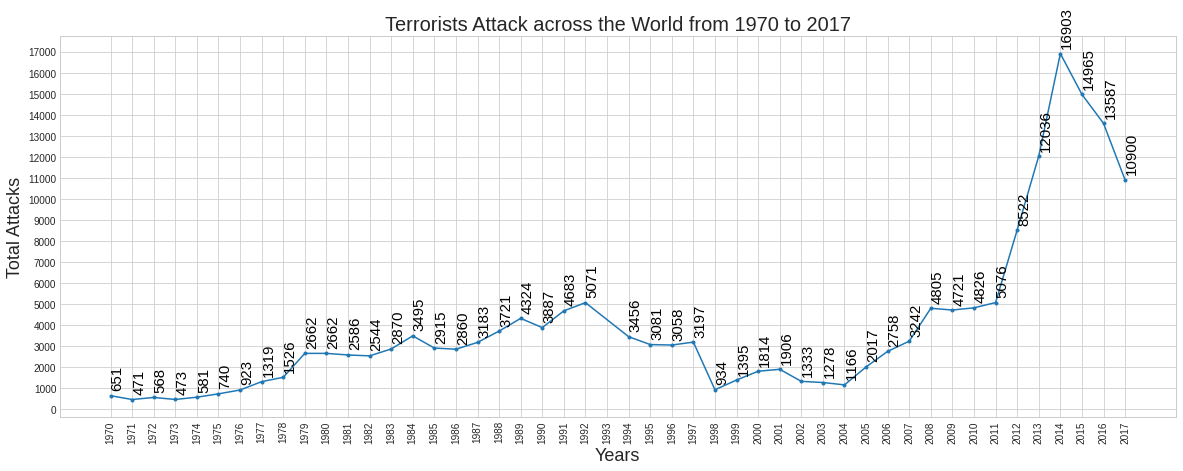

In [22]:
# plotting a line graph to show the total rise of terrorism from 1970 to 2017

plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
plt.title("Terrorists Attack across the World from 1970 to 2017", fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,20000,1000))
plt.plot(gt_df_attacks,marker='.')


for k, v in gt_df_attacks_dict.items():
  plt.annotate(v, (k,v+400), size=15, rotation=90, color='Black')

In [23]:
# Region wise total number of attacks.
gt_df_region_attack = gt_df['Region'].value_counts()
gt_df_region_attack.sort_index(inplace = True)

In [24]:
gt_df_region_attack

Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Region, dtype: int64

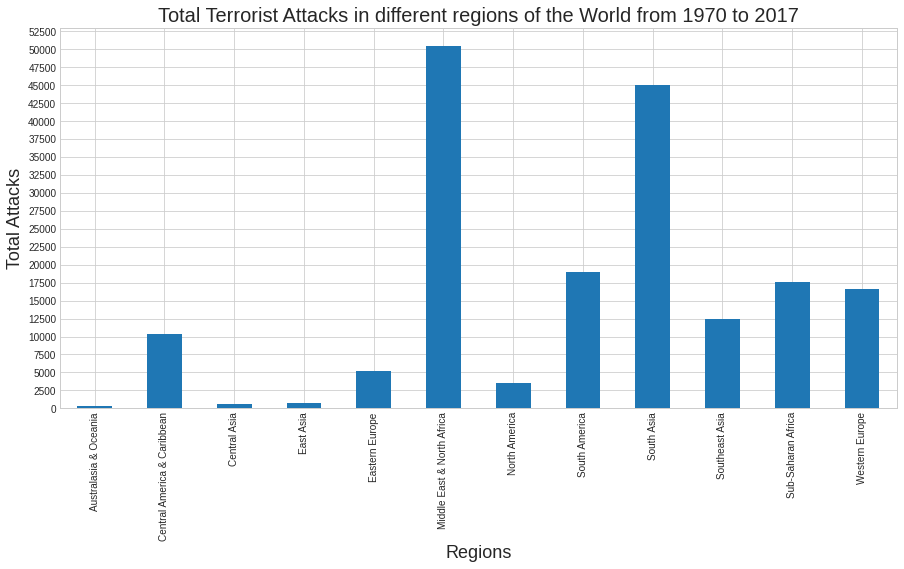

In [25]:
#Plotting a bar graph to show the total attacks in different regions of the world over the years
plt.figure(figsize=(15,7))
plt.title("Total Terrorist Attacks in different regions of the World from 1970 to 2017", fontsize=20)
plt.xlabel('Regions', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.yticks(np.arange(0,70000,2500))
gt_df_region_attack.plot(kind='bar')
plt.show()

#### Getting a table to show region wise data for the number of attacks, total death, perpeterators death, total wounded and perpeterators wounded.

In [26]:
gt_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region', 'Attack',
       'Target', 'Group_Name', 'Motive', 'Weapon', 'Death',
       'Perpetrator_Death', 'Wounded', 'Perpetrator_Wounded', 'Property',
       'Ransom_Amt'],
      dtype='object')

In [27]:
gt_df_regions_casualties = gt_df.groupby('Region')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [28]:
# Getting different array of 'gt_df_regions_casualties' dataframe
gt_df_regions_casualties_array = gt_df_regions_casualties.values
gt_df_regions_casualties_array

array([[1.50000e+02, 1.30000e+01, 2.60000e+02, 7.00000e+00],
       [2.87080e+04, 2.46000e+02, 8.99100e+03, 2.10000e+01],
       [1.00000e+03, 5.50000e+01, 2.00900e+03, 9.00000e+00],
       [1.15200e+03, 2.52000e+02, 9.21300e+03, 3.40000e+01],
       [7.41500e+03, 1.26800e+03, 1.20450e+04, 4.74000e+02],
       [1.37642e+05, 1.97880e+04, 2.14308e+05, 2.02000e+03],
       [4.91600e+03, 8.50000e+01, 2.15310e+04, 3.70000e+01],
       [2.88490e+04, 7.89000e+02, 1.67040e+04, 6.90000e+01],
       [1.01319e+05, 2.13420e+04, 1.41360e+05, 8.16100e+03],
       [1.56370e+04, 1.23300e+03, 2.62590e+04, 4.30000e+02],
       [7.83860e+04, 1.29700e+04, 5.28570e+04, 7.36000e+02],
       [6.69400e+03, 2.50000e+02, 1.83320e+04, 6.30000e+01]])

In [29]:
#Combining the above array {"gt_df_regions_casualties"} with 'gt_df_region_attack' array
gt_df_region_attack_array = np.insert(gt_df_regions_casualties_array, 0, gt_df_region_attack, axis = 1)
gt_df_region_attack_array

array([[2.82000e+02, 1.50000e+02, 1.30000e+01, 2.60000e+02, 7.00000e+00],
       [1.03440e+04, 2.87080e+04, 2.46000e+02, 8.99100e+03, 2.10000e+01],
       [5.63000e+02, 1.00000e+03, 5.50000e+01, 2.00900e+03, 9.00000e+00],
       [8.02000e+02, 1.15200e+03, 2.52000e+02, 9.21300e+03, 3.40000e+01],
       [5.14400e+03, 7.41500e+03, 1.26800e+03, 1.20450e+04, 4.74000e+02],
       [5.04740e+04, 1.37642e+05, 1.97880e+04, 2.14308e+05, 2.02000e+03],
       [3.45600e+03, 4.91600e+03, 8.50000e+01, 2.15310e+04, 3.70000e+01],
       [1.89780e+04, 2.88490e+04, 7.89000e+02, 1.67040e+04, 6.90000e+01],
       [4.49740e+04, 1.01319e+05, 2.13420e+04, 1.41360e+05, 8.16100e+03],
       [1.24850e+04, 1.56370e+04, 1.23300e+03, 2.62590e+04, 4.30000e+02],
       [1.75500e+04, 7.83860e+04, 1.29700e+04, 5.28570e+04, 7.36000e+02],
       [1.66390e+04, 6.69400e+03, 2.50000e+02, 1.83320e+04, 6.30000e+01]])

In [30]:
# Getting the list of 'Regions'
region_list = gt_df['Region'].unique()
region_list.sort()
print(region_list)

['Australasia & Oceania' 'Central America & Caribbean' 'Central Asia'
 'East Asia' 'Eastern Europe' 'Middle East & North Africa' 'North America'
 'South America' 'South Asia' 'Southeast Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [31]:
# Creating a list of Columns
region_column_name = ['Attacks', 'Deaths', 'Perpetrator_Death',	'Wounded',	'Perpetrator_Wounded']

In [32]:
#Creating a 'DataFrame' to give complete data about the attacks and their outcome
region_attack_df = pd.DataFrame(data=gt_df_region_attack_array, index=region_list, columns=region_column_name).astype(int)
region_attack_df.loc['Total'] = region_attack_df.sum(numeric_only=True, axis=0)
region_attack_df

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Australasia & Oceania,282,150,13,260,7
Central America & Caribbean,10344,28708,246,8991,21
Central Asia,563,1000,55,2009,9
East Asia,802,1152,252,9213,34
Eastern Europe,5144,7415,1268,12045,474
Middle East & North Africa,50474,137642,19788,214308,2020
North America,3456,4916,85,21531,37
South America,18978,28849,789,16704,69
South Asia,44974,101319,21342,141360,8161
Southeast Asia,12485,15637,1233,26259,430


#### Plotting a line graph for 3-most violent regions i.e. "Middle East & North Africa", "South Asia" and "South America".

In [33]:
#For Middle East & North Africa	
midEast_and_northAfrica_df = gt_df.loc[gt_df['Region']=='Middle East & North Africa']
midEast_and_northAfrica_attacks = midEast_and_northAfrica_df['Year'].value_counts()
midEast_and_northAfrica_attacks.sort_index(inplace=True)

In [34]:
#For South Asia
southAsia_df = gt_df.loc[gt_df['Region']=='South Asia']
southAsia_attacks = southAsia_df['Year'].value_counts()
southAsia_attacks.sort_index(inplace=True)

In [35]:
#For South America
south_America_df = gt_df.loc[gt_df['Region']=='South America']
south_America_attacks = south_America_df['Year'].value_counts()
south_America_attacks.sort_index(inplace=True)

In [36]:
# Giving the names to columns for attacks
midEast_and_northAfrica_attacks = midEast_and_northAfrica_attacks.rename(index='Middle_East_and_North_Africa_Attacks')
southAsia_attacks = southAsia_attacks.rename(index='South_Asia_Attacks')
south_America_attacks = south_America_attacks.rename(index='South_America_Attacks')

#Combining all three into one Data Frame
three_violent_regions = pd.concat([midEast_and_northAfrica_attacks, southAsia_attacks, south_America_attacks], axis=1)

#Filling the NaN values
three_violent_regions.fillna(0, inplace=True)

#Changing the datatype to "int"
three_violent_regions = three_violent_regions.astype(int)

In [37]:
three_violent_regions

,Middle_East_and_North_Africa_Attacks,South_Asia_Attacks,South_America_Attacks
1970,28,1,65
1971,55,0,24
1972,53,1,33
1973,19,1,83
1974,42,2,81
1975,44,4,55
1976,55,4,91
1977,211,2,119
1978,128,2,222
1979,455,34,236


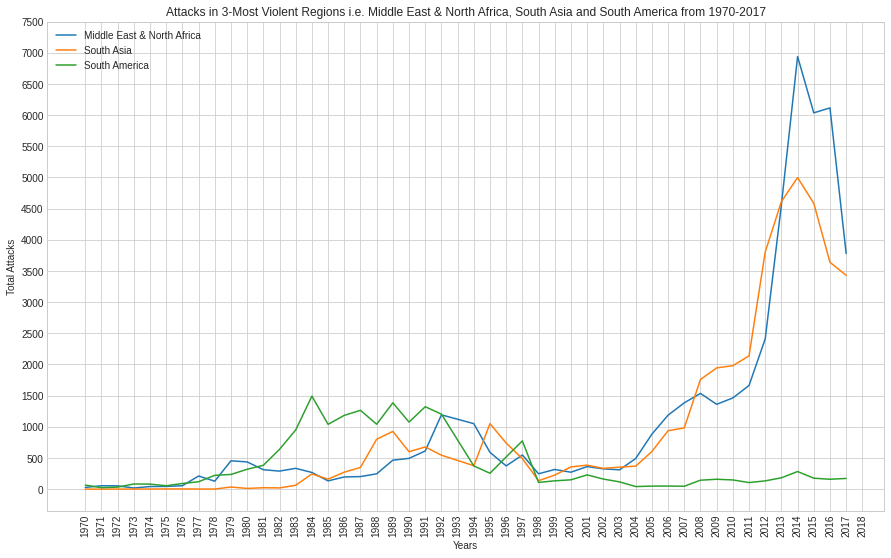

In [38]:
# Plotting a graph to compare 3-most violent regions using "three_violent_regions" DataFrame
plt.figure(figsize=(15,9))
plt.plot(three_violent_regions)
plt.legend(['Middle East & North Africa','South Asia','South America'])
plt.title("Attacks in 3-Most Violent Regions i.e. Middle East & North Africa, South Asia and South America from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,8000,500))

plt.xticks(rotation=90)
plt.show()

### Ploting a "Stack Plot" for 3-most violent regions

In [39]:
# Getting all the required lists
three_violent_regions_list = list(three_violent_regions.index)
Middle_East_and_North_Africa_Attacks_list = list(three_violent_regions['Middle_East_and_North_Africa_Attacks'])
South_Asia_Attacks_list	= list(three_violent_regions['South_Asia_Attacks'])	
South_America_Attacks_list = list(three_violent_regions['South_America_Attacks'])	

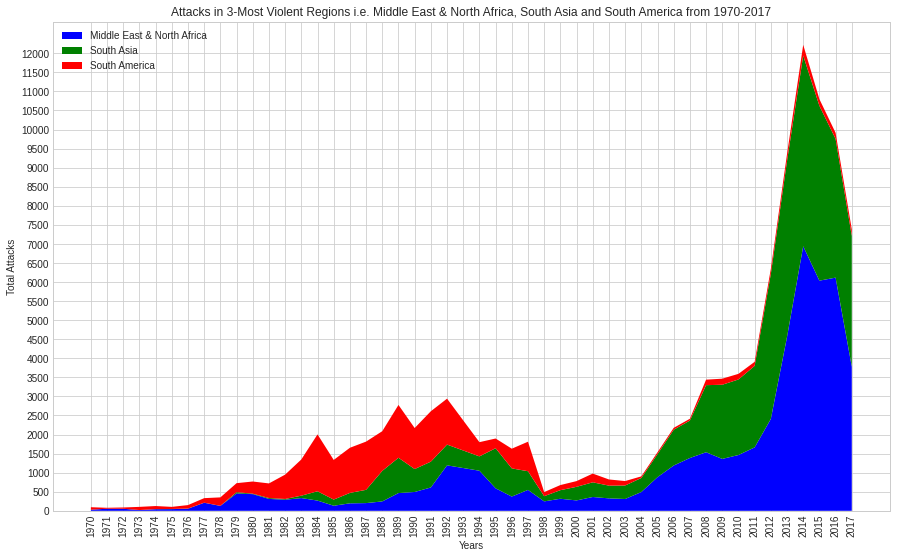

In [40]:
plt.figure(figsize=(15,9))
labels = ['Middle East & North Africa','South Asia','South America']
colors = ['b','g','r']
plt.stackplot(three_violent_regions_list, Middle_East_and_North_Africa_Attacks_list, South_Asia_Attacks_list, South_America_Attacks_list, labels=labels, colors=colors)
plt.legend(loc='upper left')
plt.title("Attacks in 3-Most Violent Regions i.e. Middle East & North Africa, South Asia and South America from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,12500,500))

plt.xticks(rotation=90)
plt.show()

#### 10-Most Violent Organisations in the World (Unknown + other 9)

In [41]:
# Knowing the total number of violent organisation in the world given in the database
violent_org_world = len(list(gt_df['Group_Name'].value_counts()))
print(f'As per the dataset there are {violent_org_world} in the world that are persuing their goals with the means of violence.')

As per the dataset there are 3537 in the world that are persuing their goals with the means of violence.


In [42]:
# Getting a series or organisation and total number of attacks carried out by them
attacks_by_org_Inworld = gt_df.groupby('Group_Name')['Year'].count()
attacks_by_org_Inworld

Group_Name
1 May                                    10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zulu Miners                               1
Zuwar al-Imam Rida                        1
Zviadists                                 1
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
Name: Year, Length: 3537, dtype: int64

In [43]:
#Getting a DataFrame of violent organistion with 'Death', 'Perpetrator_Death', 'Wounded' and 'Perpetrator_Wounded'
org_involved_world_df = gt_df.groupby('Group_Name')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum().astype(int)
org_involved_world_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Group_Name,,,,
1 May,2,0,0,0
14 K Triad,0,0,0,0
14 March Coalition,5,0,80,0
14th of December Command,0,0,0,0
15th of September Liberation Legion,0,0,1,1
...,...,...,...,...
Zulu Miners,1,0,10,0
Zuwar al-Imam Rida,0,0,0,0
Zviadists,0,0,0,0


#### Mergin the "attacks_by_org_Inworld" series with "org_involved_world_df" to get the complete picture.

In [44]:
org_involved_world_array = org_involved_world_df.values
org_involved_world_array

array([[ 2,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 5,  0, 80,  0],
       ...,
       [ 0,  0,  0,  0],
       [ 5,  5,  0,  0],
       [ 0,  0,  0,  0]])

In [45]:
org_involved_array = np.insert(org_involved_world_array, 0, attacks_by_org_Inworld, axis=1)
org_involved_array

array([[10,  2,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 1,  5,  0, 80,  0],
       ...,
       [ 1,  0,  0,  0,  0],
       [ 1,  5,  5,  0,  0],
       [ 1,  0,  0,  0,  0]])

In [46]:
org_world_list = gt_df['Group_Name'].unique()
org_world_list.sort()
print(len(org_world_list))

3537


In [47]:
org_world_columnName = ['Attacks', 'Deaths', 'Perpetrator_Death',	'Wounded',	'Perpetrator_Wounded']

In [48]:
org_world_stat_df = pd.DataFrame(data=org_involved_array, index=org_world_list, columns=org_world_columnName)

In [49]:
org_world_stat_df.sort_values(by='Attacks', ascending=False, inplace=True)

In [50]:
org_world_stat_df.head(10)

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Unknown,82782,112367,7320,210339,1218
Taliban,7478,29410,13254,27932,6534
Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
Shining Path (SL),4555,11601,128,3031,4
Farabundo Marti National Liberation Front (FMLN),3351,8065,84,4065,1
Al-Shabaab,3288,9330,2445,7624,250
New People's Army (NPA),2772,4386,382,3333,115
Irish Republican Army (IRA),2671,1804,72,3658,7
Revolutionary Armed Forces of Colombia (FARC),2487,5661,275,4354,25
Boko Haram,2418,20328,6202,9473,100


In [51]:
# Giving the index a column "Group_Name" and creating a proper dataframe for organisations and information associated for attacks and consequences of these organisations
org_df = org_world_stat_df.reset_index()
org_df.columns

Index(['index', 'Attacks', 'Deaths', 'Perpetrator_Death', 'Wounded',
       'Perpetrator_Wounded'],
      dtype='object')

In [52]:
org_df.rename(columns = {"index":"Group_Name"}, inplace=True)

In [53]:
org_df

,Group_Name,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
0,Unknown,82782,112367,7320,210339,1218
1,Taliban,7478,29410,13254,27932,6534
2,Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
3,Shining Path (SL),4555,11601,128,3031,4
4,Farabundo Marti National Liberation Front (FMLN),3351,8065,84,4065,1
...,...,...,...,...,...,...
3532,Jaish al-Muhajireen wal-Ansar (Muhajireen Army),1,1,0,0,0
3533,Jaish al-Islam (Libya),1,0,0,0,0
3534,Jaish Tahkim al-Din,1,3,1,2,0
3535,Jaish Al-Umma (Army of the Nation),1,0,0,0,0


In [54]:
# Getting the required variables for plotting the graph to show organisation that carried out the highest number of attakcs.
orgName_attack = org_df['Group_Name'].head(10)
orgAttacks = org_df['Attacks'].head(10)

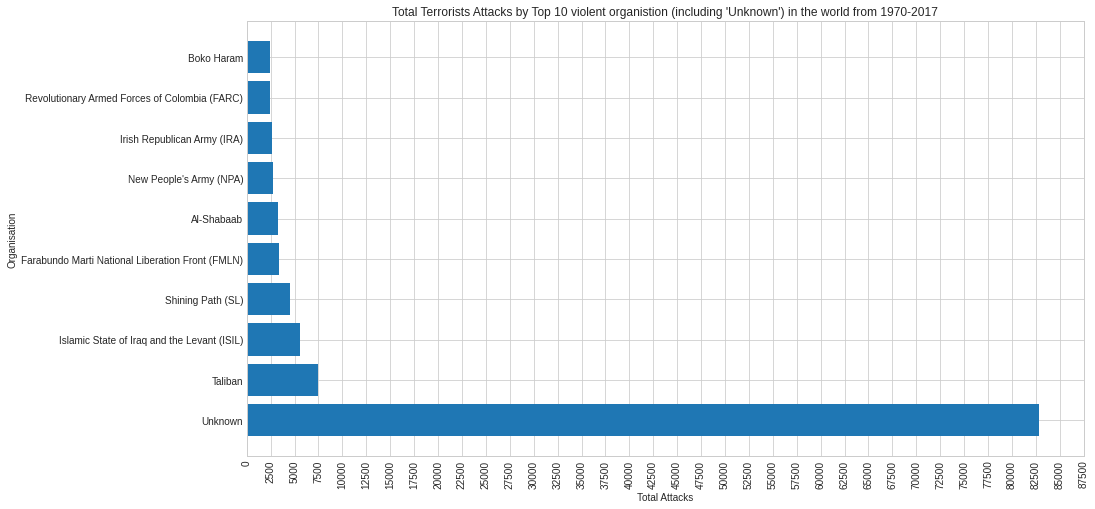

In [55]:
#Plotting a horizontal bar graph to show to 10 organisation with highest number of attacks carried out by them (including "unknown")
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(orgName_attack,orgAttacks)
plt.title("Total Terrorists Attacks by Top 10 violent organistion (including 'Unknown') in the world from 1970-2017")
plt.ylabel('Organisation')
plt.xlabel('Total Attacks')
plt.xticks(np.arange(0,90000,2500))
plt.xticks(rotation=90)
plt.show()

In [56]:
# Creating a new DataFrame by sorting the 'org_df' on the basis of the number 'Deaths'
org_df_2 = org_df.sort_values(by='Deaths', ascending=False)
org_df_2

,Group_Name,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
0,Unknown,82782,112367,7320,210339,1218
2,Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
1,Taliban,7478,29410,13254,27932,6534
9,Boko Haram,2418,20328,6202,9473,100
3,Shining Path (SL),4555,11601,128,3031,4
...,...,...,...,...,...,...
2016,Somali Salvation Democratic Front (SSDF),1,0,0,0,0
2015,Somoza Sympathizers,1,0,0,0,0
2013,Students U of PNG,1,0,0,0,0
2011,Students For Insurrection,1,0,0,0,0


In [57]:
#Getting a variables for Death
orgName_deaths = org_df_2['Group_Name'].head(10)
orgDeaths = org_df_2['Deaths'].head(10)

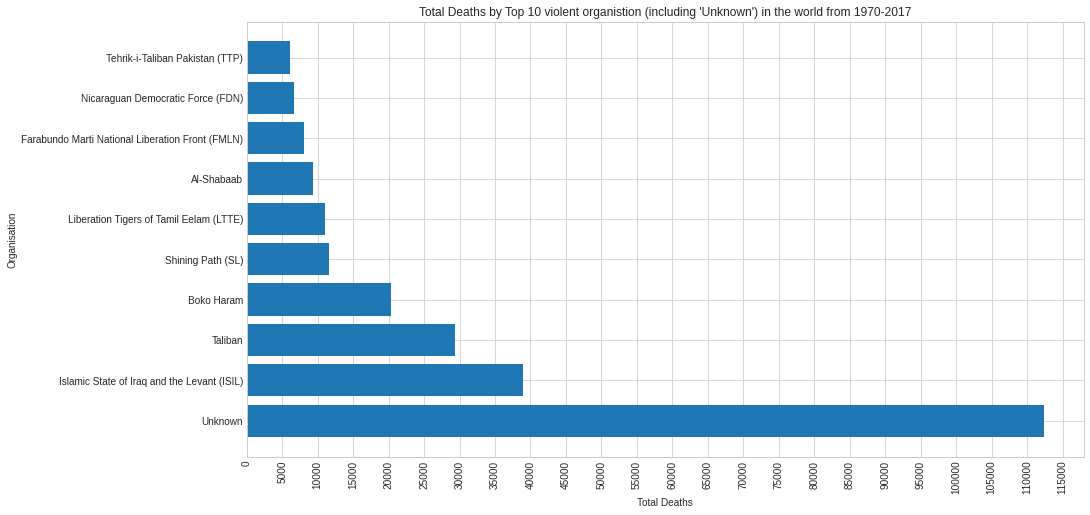

In [58]:
fig, dx = plt.subplots(figsize=(15,8))
dx.barh(orgName_deaths,orgDeaths)
plt.title("Total Deaths by Top 10 violent organistion (including 'Unknown') in the world from 1970-2017")
plt.ylabel('Organisation')
plt.xlabel('Total Deaths')
plt.xticks(np.arange(0,120000,5000))
plt.xticks(rotation=90)
plt.show()

### Based on the above Two Charts we can conclude that some organisations have more Attack to Death Ratio

### Pie chart, Treemap etc

In [59]:
weapon_used_global = gt_df['Weapon'].value_counts()


In [70]:
weapon_list = list(gt_df['Weapon'].unique())

In [72]:
weapon_list.sort()

In [73]:
weapon_list

['Biological',
 'Chemical',
 'Explosives',
 'Fake Weapons',
 'Firearms',
 'Incendiary',
 'Melee',
 'Other',
 'Radiological',
 'Sabotage Equipment',
 'Unknown',
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']

In [79]:
weapon_used_global = weapon_used_global.sort_index().values

In [80]:
weapon_used_global

array([   35,   321, 92426,    33, 58524, 11135,  3655,   114,    14,
         141, 15157,   136])

In [90]:
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
textprops = {"fontsize":15}
wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"} # Width = 1

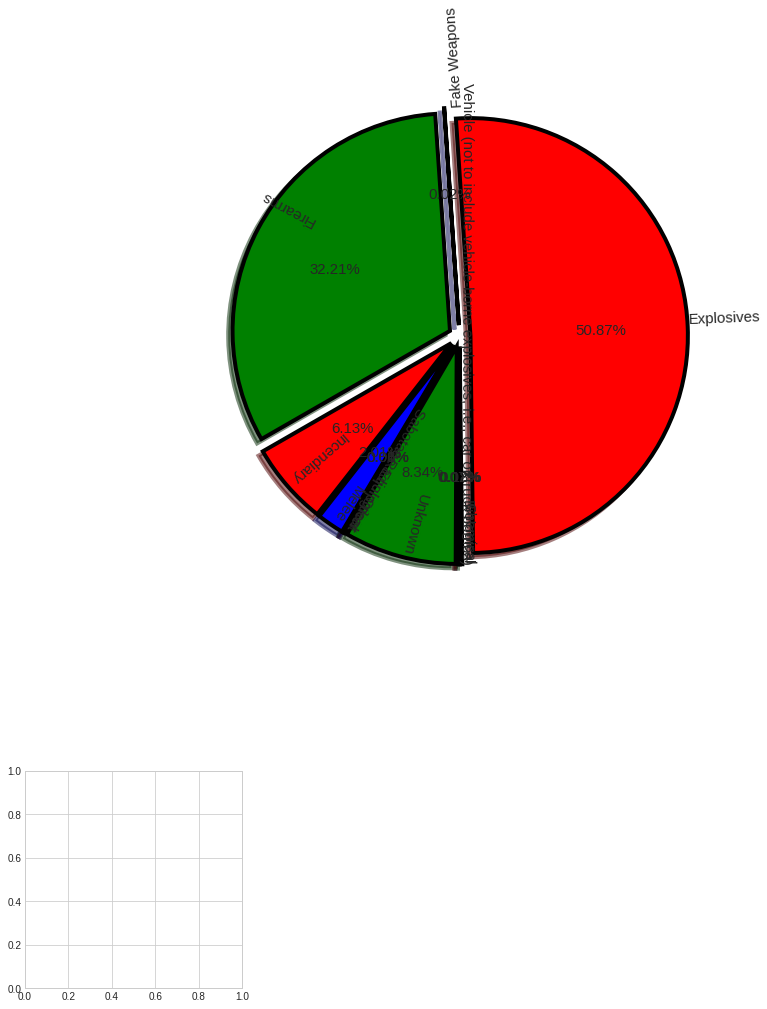

In [95]:

plt.pie(weapon_used_global, labels=weapon_list,
        explode = explode, 
        colors = colors, 
        autopct = "%0.2f%%", 
        pctdistance = 0.6, 
        shadow =True, 
        labeldistance = 1, 
        startangle = 270,
        radius = 1, 
        counterclock = True, 
        wedgeprops = wedgeprops,
        textprops = textprops,
        center=(2, 3),
        frame=True,
        rotatelabels=True
        ) 
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

plt.show()

### Find out the percentage of attacks carried out by every weapon.

#South Asia

In [99]:
#Printing the Data Frame for South Asia
southAsia_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
585,1970,11,1,Pakistan,Sindh,Karachi,South Asia,Assassination,Government (Diplomatic),Unknown,Unknown,Vehicle (not to include vehicle-borne explosiv...,4.0,0.0,20.0,0.0,Unknown,0.0
1186,1972,2,22,India,Delhi,New Delhi,South Asia,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,5000000.0
1863,1973,5,1,Afghanistan,Kabul,Kabul,South Asia,Unknown,Airports & Aircraft,Black December,Unknown,Unknown,0.0,0.0,1.0,0.0,Unknown,0.0
2217,1974,2,2,Pakistan,Sindh,Karachi,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
2705,1974,12,9,Pakistan,North-West Frontier Province,Peshawar,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.0,0.0,2.0,0.0,Minor (likely < $1 million),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181676,2017,12,31,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181683,2017,12,31,Afghanistan,Faryab,Kohistan district,South Asia,Armed Assault,Terrorists/Non-State Militia,Taliban,"The specific motive is unknown; however, sourc...",Firearms,6.0,0.0,0.0,0.0,Unknown,0.0
181684,2017,12,31,India,Assam,Hungrum,South Asia,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
181685,2017,12,31,Afghanistan,Faryab,Maymana,South Asia,Bombing/Explosion,Business,Unknown,Unknown,Explosives,0.0,0.0,4.0,0.0,Minor (likely < $1 million),0.0


In [100]:
southAsia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44974 entries, 585 to 181689
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 44974 non-null  int64  
 1   Month                44974 non-null  int64  
 2   Day                  44974 non-null  int64  
 3   Country              44974 non-null  object 
 4   State                44974 non-null  object 
 5   City                 44974 non-null  object 
 6   Region               44974 non-null  object 
 7   Attack               44974 non-null  object 
 8   Target               44974 non-null  object 
 9   Group_Name           44974 non-null  object 
 10  Motive               44974 non-null  object 
 11  Weapon               44974 non-null  object 
 12  Death                44974 non-null  float64
 13  Perpetrator_Death    44974 non-null  float64
 14  Wounded              44974 non-null  float64
 15  Perpetrator_Wounded  44974 non-nu

In [103]:
#Attacks in different countries in the South Asia over the year
southAsia_nations = southAsia_df['Country'].value_counts()

In [104]:
southAsia_nations

Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: Country, dtype: int64

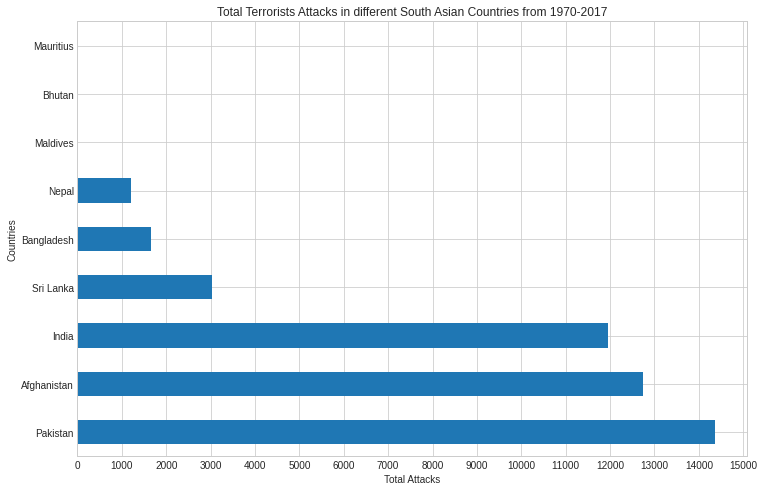

In [107]:
# Horizontal Bar Graph to show attack over the year
plt.figure(figsize=(12,8))
plt.title("Total Terrorists Attacks in different South Asian Countries from 1970-2017")
plt.ylabel('Countries')
plt.xlabel('Total Attacks')
plt.xticks(np.arange(0,20000,1000))
southAsia_nations.plot(kind='barh')
plt.show()

In [111]:
#Creating a dataframe to show the countries along with attacks, death, perpeterato_death, wounded and perpetrator_wounded in different countries in South Asia.
sAsia_attack_stat = southAsia_df.groupby('Country')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [117]:
southAsia_nations.sort_index(inplace=True)

In [118]:
southAsia_nations

Afghanistan    12731
Bangladesh      1648
Bhutan             6
India          11960
Maldives          22
Mauritius          2
Nepal           1215
Pakistan       14368
Sri Lanka       3022
Name: Country, dtype: int64

In [120]:
sAsia_attack_stat

,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Country,,,,
Afghanistan,39384.0,15450.0,44277.0,7119.0
Bangladesh,1244.0,93.0,8225.0,46.0
Bhutan,9.0,0.0,5.0,0.0
India,19341.0,933.0,28980.0,189.0
Maldives,20.0,0.0,122.0,1.0
Mauritius,0.0,0.0,1.0,0.0
Nepal,1969.0,712.0,2151.0,230.0
Pakistan,23822.0,2995.0,42038.0,499.0
Sri Lanka,15530.0,1159.0,15561.0,77.0


In [143]:
frames = [southAsia_nations, sAsia_attack_stat]

In [144]:
sA_incident_df = pd.concat(frames, axis=1).astype(int)

In [145]:
sA_incident_df

,Country,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Country,,,,,
Afghanistan,12731,39384,15450,44277,7119
Bangladesh,1648,1244,93,8225,46
Bhutan,6,9,0,5,0
India,11960,19341,933,28980,189
Maldives,22,20,0,122,1
Mauritius,2,0,0,1,0
Nepal,1215,1969,712,2151,230
Pakistan,14368,23822,2995,42038,499
Sri Lanka,3022,15530,1159,15561,77


In [151]:
sA_incident_df.rename(columns = {"Country":"Attacks"}, inplace=True)
sA_incident_df.loc['Total'] = sA_incident_df.sum(numeric_only=True, axis=0)
sA_incident_df.sort_values(by='Attacks', ascending=False)

,Attacks,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Country,,,,,
Total,224870,506595,106710,706800,40805
Pakistan,14368,23822,2995,42038,499
Afghanistan,12731,39384,15450,44277,7119
India,11960,19341,933,28980,189
Sri Lanka,3022,15530,1159,15561,77
Bangladesh,1648,1244,93,8225,46
Nepal,1215,1969,712,2151,230
Maldives,22,20,0,122,1
Bhutan,6,9,0,5,0


Organisation invloved in attacks in South Asia.

In [155]:
sAsia_org_num = len(list(southAsia_df['Group_Name'].value_counts()))
print(f'There are {sAsia_org_num} organisation in South Asia that are involved in violent activities.')

There are 591 organisation in South Asia that are involved in violent activities.


Work on Organisation in South Asia

## The Legacy: Exploring the terrorist attacks in India, Pakistan and Afghanistan

#### India

In [156]:
# Creating a Data Frame for India
ind_df = gt_df.loc[gt_df['Country']=='India']

In [157]:
ind_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
1186,1972,2,22,India,Delhi,New Delhi,South Asia,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,5000000.0
2764,1975,1,2,India,Bihar,Samastipur,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,0.0,0.0,Unknown,0.0
3857,1976,5,26,India,Delhi,New Delhi,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
5327,1977,9,28,India,Maharashtra,Bombay,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,6000000.0
7337,1979,1,13,India,Assam,Unknown,South Asia,Armed Assault,Police,Naga People,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,30,India,Kerala,Koothuparamba,South Asia,Bombing/Explosion,Police,Unknown,"The specific motive is unknown; however, sourc...",Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
181665,2017,12,30,India,Chhattisgarh,Toylanka,South Asia,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),"The specific motive is unknown; however, sourc...",Firearms,0.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181672,2017,12,31,India,Jammu and Kashmir,Lethapora,South Asia,Armed Assault,Police,Jaish-e-Mohammad (JeM),"The specific motive is unknown; however, sourc...",Explosives,8.0,3.0,3.0,0.0,Unknown,0.0
181684,2017,12,31,India,Assam,Hungrum,South Asia,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0


In [158]:
#Creating a series to know the number of attacks in India over the years
ind_attack = ind_df['Country'].value_counts()
ind_attack_years = ind_df['Year'].value_counts()
ind_attack_years.sort_index(inplace=True)
ind_attack_years

1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: Year, dtype: int64

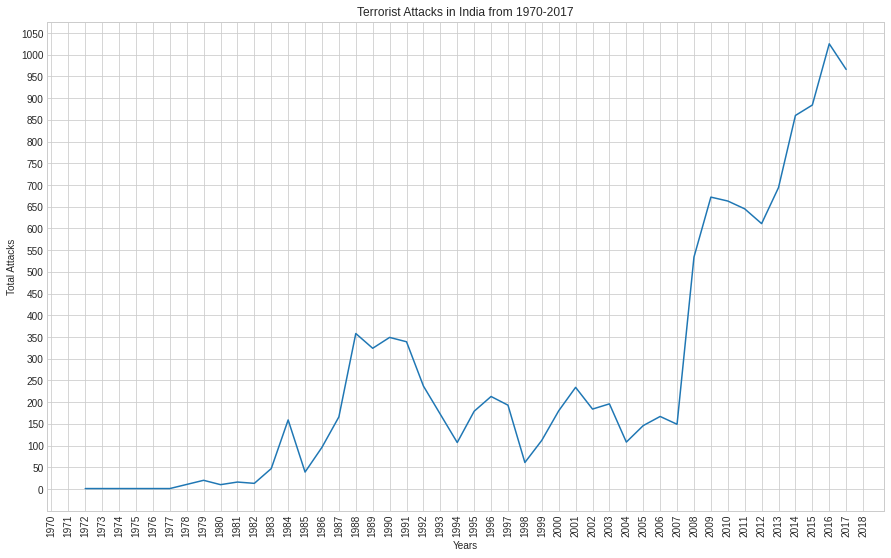

In [162]:
#Plotting a line graph to get the information about the number of attacks in India over the year
plt.figure(figsize=(15,9))
plt.plot(ind_attack_years)
plt.title("Terrorist Attacks in India from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,1100,50))

plt.xticks(rotation=90)
plt.show()

### Pakistan

In [163]:
# Creating a DataFrame for Pakistan
pak_df = gt_df.loc[gt_df['Country']=='Pakistan']

In [169]:
# Plotting the Data Frame of Pakistan
pak_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
585,1970,11,1,Pakistan,Sindh,Karachi,South Asia,Assassination,Government (Diplomatic),Unknown,Unknown,Vehicle (not to include vehicle-borne explosiv...,4.0,0.0,20.0,0.0,Unknown,0.0
2217,1974,2,2,Pakistan,Sindh,Karachi,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
2705,1974,12,9,Pakistan,North-West Frontier Province,Peshawar,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.0,0.0,2.0,0.0,Minor (likely < $1 million),0.0
2744,1975,0,0,Pakistan,Punjab,Rawalpindi,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
2795,1975,2,8,Pakistan,North-West Frontier Province,Peshawar,South Asia,Assassination,Government (General),National Awami Party,Unknown,Firearms,1.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181598,2017,12,28,Pakistan,Balochistan,Jalal,South Asia,Bombing/Explosion,Utilities,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
181599,2017,12,28,Pakistan,Balochistan,Kohlu,South Asia,Bombing/Explosion,Educational Institution,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181608,2017,12,28,Pakistan,Punjab,Rawalpindi,South Asia,Armed Assault,Police,Unknown,Unknown,Firearms,1.0,0.0,2.0,0.0,Unknown,0.0
181627,2017,12,29,Pakistan,Balochistan,Dera Bugti,South Asia,Bombing/Explosion,Religious Figures/Institutions,Unknown,Unknown,Explosives,1.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0


In [164]:
# Creating a Series to know the number of attacks in Pakistan over the year
pak_attack = pak_df['Country'].value_counts()
pak_attack_years = pak_df['Year'].value_counts()
pak_attack_years.sort_index(inplace=True)
pak_attack_years

1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013    2215
2014    2151
2015    1243
2016     864
2017     719
Name: Year, dtype: int64

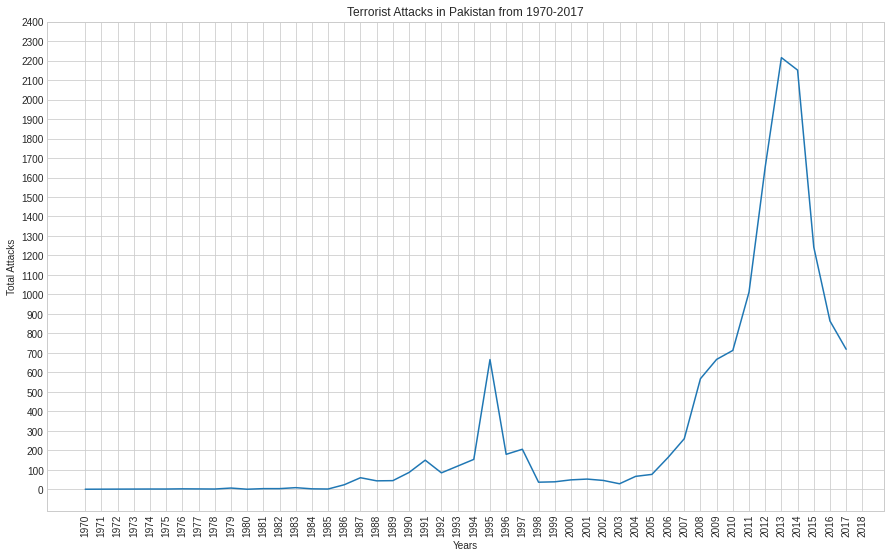

In [168]:
#Plotting a line graph to get the information about the number of attacks in Pakistan over the year
plt.figure(figsize=(15,9))
plt.plot(pak_attack_years)
plt.title("Terrorist Attacks in Pakistan from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2500,100))

plt.xticks(rotation=90)
plt.show()

### Afghanistan

In [170]:
#Creating a Data Frame for Afghanista
afg_df = gt_df.loc[gt_df['Country']=='Afghanistan']

In [171]:
# Plotting the Data Frame of Afghanistan
afg_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
1863,1973,5,1,Afghanistan,Kabul,Kabul,South Asia,Unknown,Airports & Aircraft,Black December,Unknown,Unknown,0.0,0.0,1.0,0.0,Unknown,0.0
7627,1979,2,14,Afghanistan,Kabul,Kabul,South Asia,Hostage Taking (Kidnapping),Government (Diplomatic),Shia Muslim extremists,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,0.0
9156,1979,8,27,Afghanistan,Ghazni,Ghazni,South Asia,Bombing/Explosion,Transportation,Muslim Guerrillas,Unknown,Explosives,50.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
9218,1979,9,9,Afghanistan,Herat,Herat,South Asia,Armed Assault,Tourists,Muslim Guerrillas,Unknown,Firearms,2.0,0.0,1.0,0.0,Unknown,0.0
31132,1987,5,31,Afghanistan,Unknown,Unknown,South Asia,Unarmed Assault,Private Citizens & Property,Afghan Mujahideen,Unknown,Chemical,0.0,0.0,2.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181651,2017,12,30,Afghanistan,Uruzgan,Khas Uruzgan district,South Asia,Unknown,Military,Taliban,Unknown,Unknown,11.0,10.0,15.0,8.0,Unknown,0.0
181673,2017,12,31,Afghanistan,Nangarhar,Jalalabad,South Asia,Bombing/Explosion,Private Citizens & Property,Khorasan Chapter of the Islamic State,Unknown,Explosives,18.0,0.0,14.0,0.0,Unknown,0.0
181676,2017,12,31,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181683,2017,12,31,Afghanistan,Faryab,Kohistan district,South Asia,Armed Assault,Terrorists/Non-State Militia,Taliban,"The specific motive is unknown; however, sourc...",Firearms,6.0,0.0,0.0,0.0,Unknown,0.0


In [172]:
#Creating a Series to know the number of attacks in Afghanistan over the years
afg_attack = afg_df['Country'].value_counts()
afg_attack_years = afg_df['Year'].value_counts()
afg_attack_years.sort_index(inplace=True)
afg_attack_years

1973       1
1979       3
1987       1
1988      11
1989      10
1990       2
1991      30
1992      36
1994       9
1995       6
1996       4
1997       1
1998       1
1999       9
2000      14
2001      14
2002      38
2003     100
2004      88
2005     155
2006     282
2007     341
2008     414
2009     503
2010     542
2011     421
2012    1469
2013    1443
2014    1824
2015    1928
2016    1617
2017    1414
Name: Year, dtype: int64

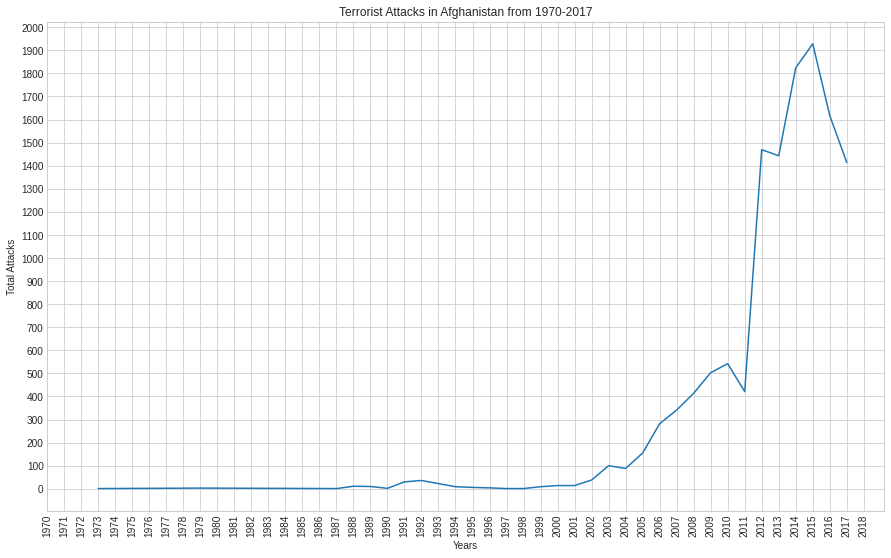

In [175]:
#Plotting a line graph to get the information about the number of attacks in Afghanistan over the year
plt.figure(figsize=(15,9))
plt.plot(afg_attack_years)
plt.title("Terrorist Attacks in Afghanistan from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2100,100))

plt.xticks(rotation=90)
plt.show()

### India, Pakistan, Afghanistan: Terrorist attack Data Frame

In [178]:
# Creating a combined Data Frame for India, Pakistan and Afghanistan
ind_attack_years_renamed = ind_attack_years.rename(index='Attacks_in_India')
pak_attack_years_renamed = pak_attack_years.rename(index='Attacks_in_Pakistan')
afg_attack_years_renamed = afg_attack_years.rename(index='Attaks_in_Afghanistan')

ind_pak_afg_df = pd.concat([ind_attack_years_renamed, pak_attack_years_renamed, afg_attack_years_renamed], axis=1)

In [181]:
# Filling the NaN values from the "ind_pak_afg_df"
ind_pak_afg_df['Attacks_in_India'].fillna(0, inplace=True)
ind_pak_afg_df['Attacks_in_Pakistan'].fillna(0, inplace=True)
ind_pak_afg_df['Attaks_in_Afghanistan'].fillna(0, inplace=True)

In [182]:
# Converting the 'Float' datatype of DataFrame into 'int' datatype
ind_pak_afg_df = ind_pak_afg_df.astype(int)

In [183]:
ind_pak_afg_df

,Attacks_in_India,Attacks_in_Pakistan,Attaks_in_Afghanistan
1970,0,1,0
1972,1,0,0
1973,0,0,1
1974,0,2,0
1975,1,2,0
1976,1,3,0
1977,1,0,0
1978,0,2,0
1979,20,7,3
1980,10,1,0


[]

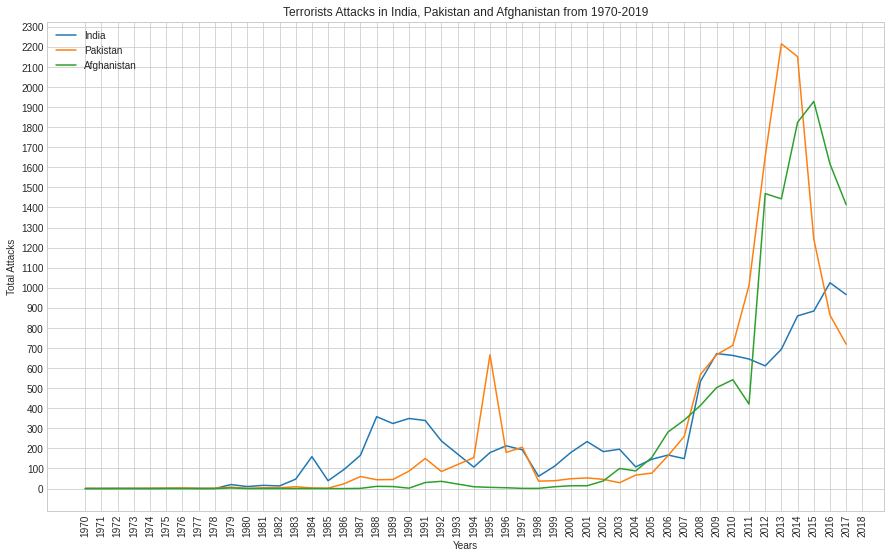

In [184]:
# Plotting the graph for the attacks in India, Pakistan and Afghanistan over the year
plt.figure(figsize=(15,9))

plt.plot(ind_pak_afg_df)
plt.legend(['India','Pakistan','Afghanistan'])

plt.title("Terrorists Attacks in India, Pakistan and Afghanistan from 1970-2019")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2500,100))
plt.plot()

#### Ploting a "Stack Plot" for attacks in India, Pakistan and Afghanistan


In [186]:
#Getting all the required lists
x_label = list(ind_pak_afg_df.index)
ind_list = list(ind_pak_afg_df['Attacks_in_India'])
pak_list = list(ind_pak_afg_df['Attacks_in_Pakistan'])
afg_list = list(ind_pak_afg_df['Attaks_in_Afghanistan'])

[]

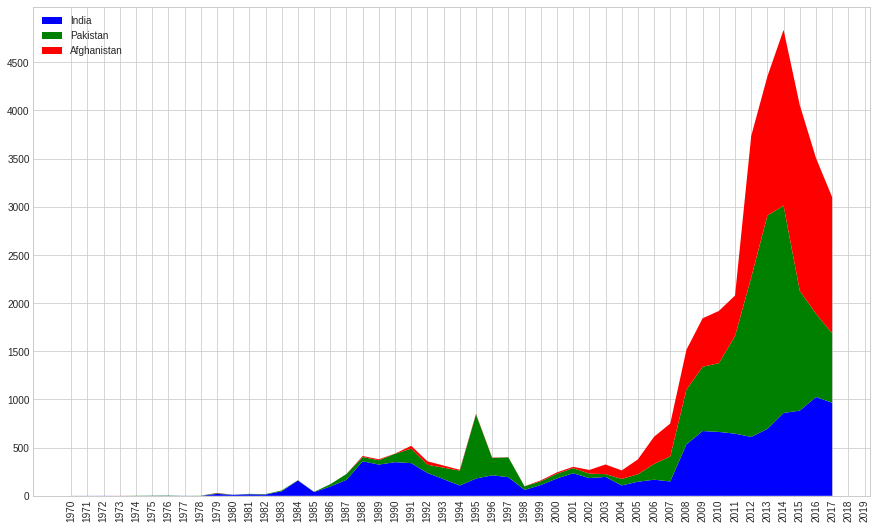

In [187]:
# Stack Plot for attacks
plt.figure(figsize=(15,9))
labels = ['India', 'Pakistan', 'Afghanistan']
colors = ['b','g','r']
plt.stackplot(x_label, ind_list, pak_list, afg_list, labels = labels, colors = colors)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2020,1))
plt.yticks(np.arange(0,5000,500))
plt.plot()

#### Comparing attacks in India with other countries in South Asia (combined excluding India) and finding when the attacks in India outnumbered the attacks in other countries of South Asia (the wave of terrorism in India).

In [191]:
# South Asian DataFrame exluding India
sAsia_notInd_df = south_asia[south_asia['Country']!='India']

In [192]:
# This Data Frame consists all countries in South Asia except India
sAsia_notInd_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
585,1970,11,1,Pakistan,Sindh,Karachi,South Asia,Assassination,Government (Diplomatic),Unknown,Unknown,Vehicle (not to include vehicle-borne explosiv...,4.0,0.0,20.0,0.0,Unknown,0.0
1863,1973,5,1,Afghanistan,Kabul,Kabul,South Asia,Unknown,Airports & Aircraft,Black December,Unknown,Unknown,0.0,0.0,1.0,0.0,Unknown,0.0
2217,1974,2,2,Pakistan,Sindh,Karachi,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Unknown,Firearms,0.0,0.0,0.0,0.0,Unknown,0.0
2705,1974,12,9,Pakistan,North-West Frontier Province,Peshawar,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,0.0,0.0,2.0,0.0,Minor (likely < $1 million),0.0
2744,1975,0,0,Pakistan,Punjab,Rawalpindi,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181651,2017,12,30,Afghanistan,Uruzgan,Khas Uruzgan district,South Asia,Unknown,Military,Taliban,Unknown,Unknown,11.0,10.0,15.0,8.0,Unknown,0.0
181673,2017,12,31,Afghanistan,Nangarhar,Jalalabad,South Asia,Bombing/Explosion,Private Citizens & Property,Khorasan Chapter of the Islamic State,Unknown,Explosives,18.0,0.0,14.0,0.0,Unknown,0.0
181676,2017,12,31,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0
181683,2017,12,31,Afghanistan,Faryab,Kohistan district,South Asia,Armed Assault,Terrorists/Non-State Militia,Taliban,"The specific motive is unknown; however, sourc...",Firearms,6.0,0.0,0.0,0.0,Unknown,0.0


In [193]:
# Attacks in South Asia (exluding India) over the years
sAsia_notInd_attackYrs = southAsia_notInd_df['Year'].value_counts()
sAsia_notInd_attackYrs.sort_index(inplace=True)
sAsia_notInd_attackYrs

1970       1
1973       1
1974       2
1975       3
1976       3
1977       1
1978       2
1979      14
1980       2
1981       7
1982       7
1983      16
1984      85
1985     122
1986     177
1987     182
1988     443
1989     602
1990     252
1991     338
1992     308
1994     269
1995     872
1996     526
1997     297
1998      75
1999     113
2000     177
2001     151
2002     150
2003     157
2004     261
2005     458
2006     771
2007     833
2008    1225
2009    1273
2010    1318
2011    1493
2012    3192
2013    3918
2014    4138
2015    3701
2016    2614
2017    2464
Name: Year, dtype: int64

[]

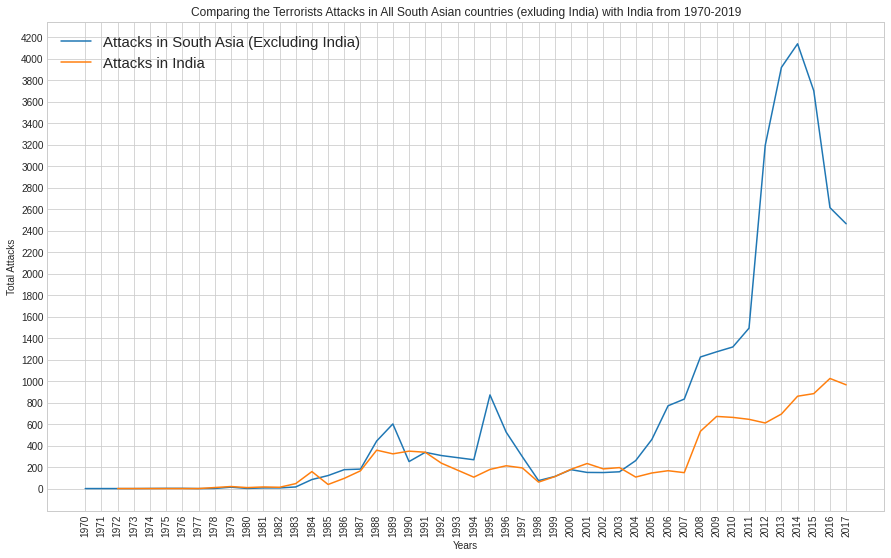

In [197]:
# Plotting a Graph to compare the attacks in India and rest of other countries in South Asia (exluding India) over the years
plt.figure(figsize=(15,9))

plt.plot(sAsia_notInd_attackYrs)
plt.plot(ind_attack_years)

plt.legend(['Attacks in South Asia (Excluding India)','Attacks in India'],fontsize = 15)

plt.title("Comparing the Terrorists Attacks in All South Asian countries (exluding India) with India from 1970-2019")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,5000,200))
plt.plot()

#### From the above graph we can conclude that there are several instances when the number of attacks in India were more compare to the attacks in all other countries in South Asia combined. So we can say that in those year India was the biggest victim of terrorism.

#### Finding years when attacks in India were more compare to other South Asian Countries combined.

In [203]:
# Renaming the series Index for attacks in South Asia (exluding India) over the years.
sAsia_notInd_attackYrs.rename(index='Attacks_in_SouthAsia_exluding_India', inplace=True)


1970       1
1973       1
1974       2
1975       3
1976       3
1977       1
1978       2
1979      14
1980       2
1981       7
1982       7
1983      16
1984      85
1985     122
1986     177
1987     182
1988     443
1989     602
1990     252
1991     338
1992     308
1994     269
1995     872
1996     526
1997     297
1998      75
1999     113
2000     177
2001     151
2002     150
2003     157
2004     261
2005     458
2006     771
2007     833
2008    1225
2009    1273
2010    1318
2011    1493
2012    3192
2013    3918
2014    4138
2015    3701
2016    2614
2017    2464
Name: Attacks_in_SouthAsia_exluding_India, dtype: int64

In [207]:
#Renaming the series Index for attacks in India over the years
ind_attack_years.rename(index='Attacks_in_India', inplace=True)

1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: Attacks_in_India, dtype: int64

In [208]:
compare_attacks_df = pd.concat([ind_attack_years, sAsia_notInd_attackYrs], axis=1)

In [209]:
compare_attacks_df.columns

Index(['Attacks_in_India', 'Attacks_in_SouthAsia_exluding_India'], dtype='object')

In [210]:
compare_attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1970 to 2017
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Attacks_in_India                     42 non-null     float64
 1   Attacks_in_SouthAsia_exluding_India  45 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [211]:
# Making index the new column named 'Year'
compare_attacks_df.reset_index(inplace=True)
compare_attacks_df = compare_attacks_df.rename(columns={'index':'Year'})

In [212]:
compare_attacks_df.head()

,Year,Attacks_in_India,Attacks_in_SouthAsia_exluding_India
0,1970,NaN,1.0
1,1972,1.0,NaN
2,1973,NaN,1.0
3,1974,NaN,2.0
4,1975,1.0,3.0


In [213]:
# Replacing NaN values from the "compare_attacks_df" and changing the datatype from "float" to "int"
compare_attacks_df['Attacks_in_India'].fillna(0, inplace=True)
compare_attacks_df['Attacks_in_SouthAsia_exluding_India'].fillna(0, inplace=True)
compare_attacks_df = compare_attacks_df.astype(int)

In [215]:
compare_attacks_df

,Year,Attacks_in_India,Attacks_in_SouthAsia_exluding_India
0,1970,0,1
1,1972,1,0
2,1973,0,1
3,1974,0,2
4,1975,1,3
5,1976,1,3
6,1977,1,1
7,1978,0,2
8,1979,20,14
9,1980,10,2


#### Getting a Data Frame to show the years when the number of attacks in India were more compare to the attacks in other South Asian countries combined

In [216]:
year_ind_more_attacks = compare_attacks_df[(compare_attacks_df['Attacks_in_India']-compare_attacks_df['Attacks_in_SouthAsia_exluding_India'])>0]

In [217]:
year_ind_more_attacks

,Year,Attacks_in_India,Attacks_in_SouthAsia_exluding_India
1,1972,1,0
8,1979,20,14
9,1980,10,2
10,1981,16,7
11,1982,13,7
12,1983,47,16
13,1984,159,85
19,1990,349,252
20,1991,339,338
28,2000,180,177


In [218]:
print('In the following years the terrorist attacks in India were more compare to other South Asian Countries combined:', list(year_ind_more_attacks['Year']))

In the following years the terrorist attacks in India were more compare to other South Asian Countries combined: [1972, 1979, 1980, 1981, 1982, 1983, 1984, 1990, 1991, 2000, 2001, 2002, 2003]


## Top 10 Violent Organisation in South Asia

In [221]:
# Total organisations
total_organisations = len(list(south_asia['Group_Name'].value_counts()))
print(f'According to the data set there are {total_organisations} organisations in the South Asian Region that persue their goals with the means of violence.')

According to the data set there are 591 organisations in the South Asian Region that persue their goals with the means of violence.


## Taliban 1.0

In [223]:
# Creating a Data Frame for "Taliban"
taliban_df = gt_df.loc[gt_df['Group_Name']=='Taliban']

In [224]:
taliban_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
59040,1995,4,20,Afghanistan,Unknown,Unknown,South Asia,Hostage Taking (Kidnapping),Police,Taliban,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,0.0
60014,1995,8,3,Afghanistan,Kandahar,Kandahar,South Asia,Hijacking,Airports & Aircraft,Taliban,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
60462,1995,9,21,Afghanistan,Kandahar,Kandahar,South Asia,Hijacking,Airports & Aircraft,Taliban,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
60786,1995,10,25,Afghanistan,Kabul,Kabul,South Asia,Bombing/Explosion,Airports & Aircraft,Taliban,Unknown,Explosives,0.0,0.0,0.0,0.0,Unknown,0.0
71682,2001,1,7,Afghanistan,Bamyan,Yakawlang,South Asia,Armed Assault,Private Citizens & Property,Taliban,"Specific motive is unknown; however, survivors...",Firearms,150.0,0.0,0.0,0.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,Afghanistan,Nangarhar,Ghani Khel district,South Asia,Unknown,Police,Taliban,Unknown,Unknown,4.0,0.0,0.0,0.0,Unknown,0.0
181619,2017,12,28,Afghanistan,Ghazni,Ghazni,South Asia,Unknown,Police,Taliban,Unknown,Unknown,3.0,0.0,1.0,0.0,Unknown,0.0
181651,2017,12,30,Afghanistan,Uruzgan,Khas Uruzgan district,South Asia,Unknown,Military,Taliban,Unknown,Unknown,11.0,10.0,15.0,8.0,Unknown,0.0
181676,2017,12,31,Afghanistan,Logar,Mohammad Agha district,South Asia,Bombing/Explosion,Police,Taliban,Unknown,Explosives,5.0,0.0,0.0,0.0,Minor (likely < $1 million),0.0


In [225]:
# Getting a list of countries where Taliban attacked
countriesAttacked_byTaliban = taliban_df['Country'].unique()

In [227]:
len(countriesAttacked_byTaliban)

3

In [228]:
print(f'Countries attacked by Taliban are: {countriesAttacked_byTaliban[0]}, {countriesAttacked_byTaliban[1]} and {countriesAttacked_byTaliban[2]}')

Countries attacked by Taliban are: Afghanistan, Pakistan and Turkmenistan


In [231]:
# Creating a series for attacks by Taliban over the years
talibanAttacks_yrs = taliban_df['Year'].value_counts()
talibanAttacks_yrs.sort_index(inplace=True)

In [232]:
# Creating a dictonary for the attacks by Taliban over the years
talibanAttacks_yrsDict = talibanAttacks_yrs.to_dict()
print(talibanAttacks_yrsDict)

{1995: 4, 2001: 4, 2002: 7, 2003: 50, 2004: 55, 2005: 120, 2006: 164, 2007: 208, 2008: 258, 2009: 268, 2010: 308, 2011: 214, 2012: 800, 2013: 775, 2014: 1035, 2015: 1249, 2016: 1065, 2017: 894}


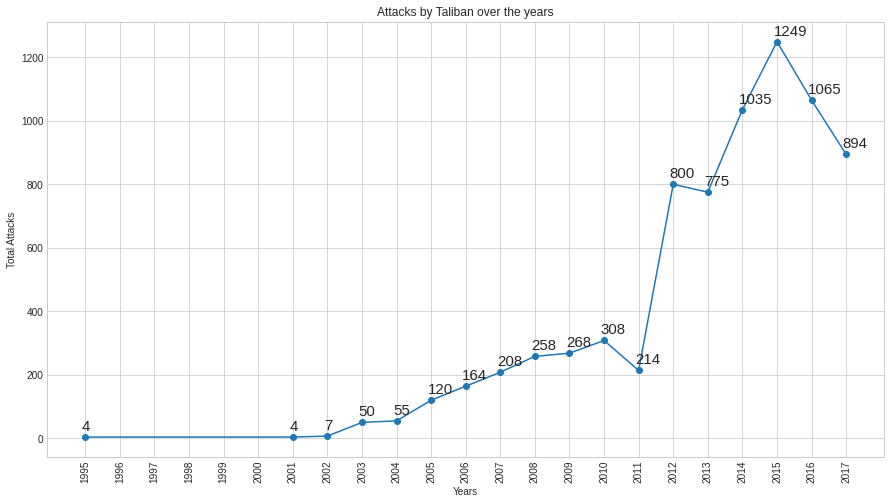

In [235]:
#Plotting a line graph to show the number of attacks by Taliban over the years
plt.figure(figsize=(15,8))
plt.title("Attacks by Taliban over the years")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1995,2018,1))
plt.plot(talibanAttacks_yrs,marker='o')

for k,v in talibanAttacks_yrsDict.items():
  plt.annotate(v, (k,v),(k-0.1,v+20), size=15)